In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

files_1 = os.listdir("ProblemCData\CO2 Emission")
print(files_1)


def preprocess(file):
    data = pd.read_excel(file).iloc[2:-5, :-2]
    # 重设列名
    data_index = np.array('State')
    data_year = np.arange(1980, 2017)
    column = np.hstack((data_index, data_year))
    data.columns = column
    # 重置索引
    data = data.reset_index(drop=True)
    return data

['coal_CO2_by_state_2019.xlsx', 'commercial_CO2_by_state_2019.xlsx', 'electricity_CO2_by_state_2019.xlsx', 'industrial_CO2_by_state_2019.xlsx', 'natural_gas_CO2_by_state_2019.xlsx', 'petroleum_CO2_by_state_2019.xlsx', 'residential_CO2_by_state_2019.xlsx', 'transportation_CO2_by_state_2019.xlsx']


In [283]:
# 1990-2016

# 人口数据
population = pd.read_excel('ProblemCData/population_1990_2020.xlsx').iloc[:,:-3]

# 每年的总排放量数据
summary = pd.read_excel('ProblemCData/summary_2016.xlsx').iloc[2:-6,:-2]
state_index = np.array('State')
state_year = np.arange(1990,2017)
column = np.hstack((state_index,state_year))
summary.columns = column
co2 = summary.reset_index(drop=True) # 重置索引

# 每年的总GDP数据
data = pd.read_excel('ProblemCData/GDP.xlsx')
State_gdp = data.iloc[1:,:-4].copy()
State_gdp = State_gdp.reset_index(drop=True)

# 三个产业数据
mining = pd.read_excel("C:\Git Code\Mathematical-modeling\Simulation practice\模拟5\ProblemCData\采矿业_1990_2020.xlsx").iloc[:,:-4]
construction = pd.read_excel("C:\Git Code\Mathematical-modeling\Simulation practice\模拟5\ProblemCData\建筑业_1990_2020.xlsx").iloc[:,:-4]
manufacturing = pd.read_excel("C:\Git Code\Mathematical-modeling\Simulation practice\模拟5\ProblemCData\制造业_1990_2020.xlsx").iloc[:,:-4]

#得到每种能源的每年消耗量
# Coal: 1827.04 short ton 短吨--> 1kg CO2
# Petroleum: 14.91 gallon 加仑 --> 1kg CO2
# Natural gas: 54870 cubic feet 立方英尺 --> 1kg CO2
# CO2单位：百万公吨
column=['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']
coal_state = preprocess(os.path.join('ProblemCData\CO2 Emission',files_1[0])).drop(columns=column)
natural_gas_state = preprocess(os.path.join('ProblemCData\CO2 Emission',files_1[4])).drop(columns=column)
petroleum_state = preprocess(os.path.join('ProblemCData\CO2 Emission',files_1[5])).drop(columns=column)
coal_state.iloc[:, 1:] = coal_state.iloc[:, 1:] * 1827.04
natural_gas_state.iloc[:, 1:] = natural_gas_state.iloc[:, 1:] * 14.91
petroleum_state.iloc[:, 1:] = petroleum_state.iloc[:, 1:] * 54870

In [41]:
def combine(i):
    target = co2.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 人数
    pp = population.iloc[i,1:].to_numpy().reshape(-1, 1)
    # 人均GDP
    gdp = (State_gdp.iloc[i, 1:]/population.iloc[i,1:]).to_numpy().reshape(-1, 1)
    # 能源消耗量
    a = coal_state.iloc[i, 1:].to_numpy().reshape(-1, 1)
    b = natural_gas_state.iloc[i, 1:].to_numpy().reshape(-1, 1)
    c = petroleum_state.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 第二产业占比
    s1 = mining.iloc[i, 1:].to_numpy().reshape(-1, 1)
    s2 = construction.iloc[i, 1:].to_numpy().reshape(-1, 1)
    s3 = manufacturing.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 合并数据
    labels = ['pp','GDP', 'coal', 'natural_gas', ' petroleum', 'mining', 'construction',' manufacturing']
    indexs = np.arange(1990, 2017)
    data = np.hstack((pp,gdp,a,b,c,s1,s2,s3))
    data = pd.DataFrame(data,columns=labels,index=indexs)
    return target.astype(np.float32),data.to_numpy().astype(np.float32)

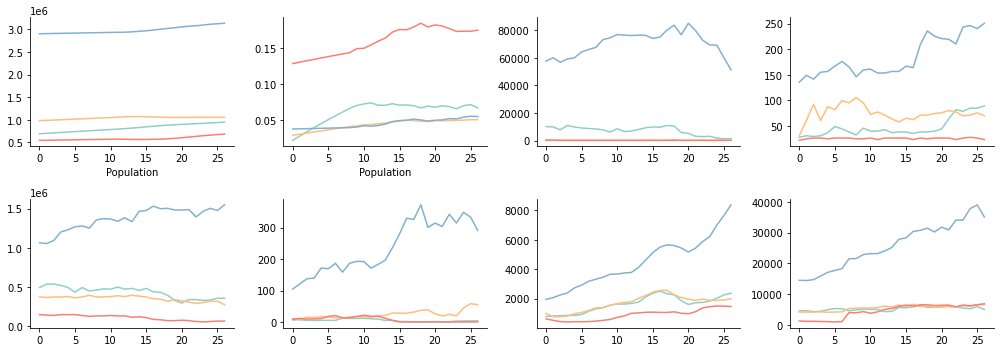

In [979]:
fig,ax = plt.subplots(2,4,figsize=(14,5))
target, x1 = combine(7) # 绿 Delaware
target, x2 = combine(39) # 橙 Rhode Island
target, x3 = combine(8) # 红 District of Columbia
target, x4 = combine(15) # 蓝 Iowa	

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].plot(x1[:,0],color='#8ECFC9')
ax[0,0].plot(x2[:,0],color='#FFBE7A')
ax[0,0].plot(x3[:,0],color='#FA7F6F')
ax[0,0].plot(x4[:,0],color='#82B0D2')
ax[0,0].set_xlabel('Population')

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].plot(x1[:,1],color='#8ECFC9')
ax[0,1].plot(x2[:,1],color='#FFBE7A')
ax[0,1].plot(x3[:,1],color='#FA7F6F')
ax[0,1].plot(x4[:,1],color='#82B0D2')
ax[0,1].set_xlabel('Population')

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].plot(x1[:,2],color='#8ECFC9')
ax[0,2].plot(x2[:,2],color='#FFBE7A')
ax[0,2].plot(x3[:,2],color='#FA7F6F')
ax[0,2].plot(x4[:,2],color='#82B0D2')

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].plot(x1[:,3],color='#8ECFC9')
ax[0,3].plot(x2[:,3],color='#FFBE7A')
ax[0,3].plot(x3[:,3],color='#FA7F6F')
ax[0,3].plot(x4[:,3],color='#82B0D2')

ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].plot(x1[:,4],color='#8ECFC9')
ax[1,0].plot(x2[:,4],color='#FFBE7A')
ax[1,0].plot(x3[:,4],color='#FA7F6F')
ax[1,0].plot(x4[:,4],color='#82B0D2')

ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].plot(x1[:,5],color='#8ECFC9')
ax[1,1].plot(x2[:,5],color='#FFBE7A')
ax[1,1].plot(x3[:,5],color='#FA7F6F')
ax[1,1].plot(x4[:,5],color='#82B0D2')

ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].plot(x1[:,6],color='#8ECFC9')
ax[1,2].plot(x2[:,6],color='#FFBE7A')
ax[1,2].plot(x3[:,6],color='#FA7F6F')
ax[1,2].plot(x4[:,6],color='#82B0D2')

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].plot(x1[:,7],color='#8ECFC9')
ax[1,3].plot(x2[:,7],color='#FFBE7A')
ax[1,3].plot(x3[:,7],color='#FA7F6F')
ax[1,3].plot(x4[:,7],color='#82B0D2')
plt.tight_layout()
plt.savefig('123.jpg',dpi=300)

## 计算未来值

In [ ]:
def combine(i):
    target = co2.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 人数
    pp = population.iloc[i,1:].to_numpy().reshape(-1, 1)
    # 人均GDP
    gdp = (State_gdp.iloc[i, 1:]/population.iloc[i,1:]).to_numpy().reshape(-1, 1)
    # 能源消耗量
    a = coal_state.iloc[i, 1:].to_numpy().reshape(-1, 1)
    b = natural_gas_state.iloc[i, 1:].to_numpy().reshape(-1, 1)
    c = petroleum_state.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 第二产业占比
    s1 = mining.iloc[i, 1:].to_numpy().reshape(-1, 1)
    s2 = construction.iloc[i, 1:].to_numpy().reshape(-1, 1)
    s3 = manufacturing.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 合并数据
    labels = ['pp','GDP', 'coal', 'natural_gas', ' petroleum', 'mining', 'construction',' manufacturing']
    indexs = np.arange(1990, 2017)
    data = np.hstack((pp,gdp,a,b,c,s1,s2,s3))
    data = pd.DataFrame(data,columns=labels,index=indexs)
    return target.astype(np.float32),data.to_numpy().astype(np.float32)

In [340]:
# 1990-2016

# 人口数据
population = pd.read_excel('ProblemCData/population_1990_2020.xlsx').iloc[:,:-3]

# 人均GDP
per_gdp = State_gdp
per_gdp.iloc[:,1:] = per_gdp.iloc[:,1:]/population.iloc[:,1:]

# 每年的总排放量数据
summary = pd.read_excel('ProblemCData/summary_2016.xlsx').iloc[2:-6,:-2]
state_index = np.array('State')
state_year = np.arange(1990,2017)
column = np.hstack((state_index,state_year))
summary.columns = column
co2 = summary.reset_index(drop=True) # 重置索引

# 每年的总GDP数据
data = pd.read_excel('ProblemCData/GDP.xlsx')
State_gdp = data.iloc[1:,:-4].copy()
State_gdp = State_gdp.reset_index(drop=True)

# 三个产业数据
mining = pd.read_excel("C:\Git Code\Mathematical-modeling\Simulation practice\模拟5\ProblemCData\采矿业_1990_2020.xlsx").iloc[:,:-4]
construction = pd.read_excel("C:\Git Code\Mathematical-modeling\Simulation practice\模拟5\ProblemCData\建筑业_1990_2020.xlsx").iloc[:,:-4]
manufacturing = pd.read_excel("C:\Git Code\Mathematical-modeling\Simulation practice\模拟5\ProblemCData\制造业_1990_2020.xlsx").iloc[:,:-4]

#得到每种能源的每年消耗量
# Coal: 1827.04 short ton 短吨--> 1kg CO2
# Petroleum: 14.91 gallon 加仑 --> 1kg CO2
# Natural gas: 54870 cubic feet 立方英尺 --> 1kg CO2
# CO2单位：百万公吨
column=['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']
coal_state = preprocess(os.path.join('ProblemCData\CO2 Emission',files_1[0])).drop(columns=column)
natural_gas_state = preprocess(os.path.join('ProblemCData\CO2 Emission',files_1[4])).drop(columns=column)
petroleum_state = preprocess(os.path.join('ProblemCData\CO2 Emission',files_1[5])).drop(columns=column)
coal_state.iloc[:, 1:] = coal_state.iloc[:, 1:] * 1827.04
natural_gas_state.iloc[:, 1:] = natural_gas_state.iloc[:, 1:] * 14.91
petroleum_state.iloc[:, 1:] = petroleum_state.iloc[:, 1:] * 54870

In [341]:
def rate(data_x):
    data = data_x.iloc[:, -5:].copy()
    result = np.zeros(51)
    for i in range(data.shape[1] - 1):
        t = (data.iloc[:, i + 1] - data.iloc[:, i]) / data.iloc[:, i]
        result += t.to_numpy()
    return result / 5


def update(data_x, rate):
    init = data_x.iloc[:, [0, -1]].copy()
    # 预测至2060年
    for i in range(2017, 2061):
        if i == 2017:
            init[str(i)] = init.iloc[:,-1] * (1 + rate)
        else:
            init[str(i)] = init[str(i - 1)] * (1 + rate)
    return init

In [342]:
population_2060 = update(population,rate(population))
per_gdp_2060 = update(per_gdp,rate(per_gdp))
mining_2060 = update(mining,rate(mining))
construction_2060 = update(construction,rate(construction))
manufacturing_2060 = update(manufacturing,rate(manufacturing))
coal_state_2060 = update(coal_state,rate(coal_state))
petroleum_state_2060 = update(petroleum_state,rate(petroleum_state))
natural_gas_state_2060 = update(natural_gas_state,rate(natural_gas_state))

In [343]:
population_2060.to_csv('ProblemCData/拟合/population_2060.csv')
per_gdp_2060.to_csv('ProblemCData/拟合/per_gdp_2060.csv')
mining_2060.to_csv('ProblemCData/拟合/mining_2060.csv')
construction_2060.to_csv('ProblemCData/拟合/construction_2060.csv')
manufacturing_2060.to_csv('ProblemCData/拟合/manufacturing_2060.csv')
coal_state_2060.to_csv('ProblemCData/拟合/coal_state_2060.csv')
petroleum_state_2060.to_csv('ProblemCData/拟合/petroleum_state_state_2060.csv')
natural_gas_state_2060.to_csv('ProblemCData/拟合/natural_gas_state_2060.csv')

In [344]:
# 检查是否有错值
True in (natural_gas_state_2060.iloc[:, 1:] <= 0).all()

False

In [353]:
def combine_forecast(i):
    # 人数
    pp = population_2060.iloc[i,1:].to_numpy().reshape(-1, 1)
    # 人均GDP
    gdp = per_gdp_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 能源消耗量
    a = coal_state_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    b = natural_gas_state_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    c = petroleum_state_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 第二产业占比
    s1 = mining_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    s2 = construction_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    s3 = manufacturing_2060.iloc[i, 1:].to_numpy().reshape(-1, 1)
    # 合并数据
    labels = ['pp','GDP', 'coal', 'natural_gas', ' petroleum', 'mining', 'construction',' manufacturing']
    indexs = np.arange(2016, 2061)
    data = np.hstack((pp,gdp,a,b,c,s1,s2,s3))
    data = pd.DataFrame(data,columns=labels,index=indexs)
    return data.to_numpy().astype(np.float32)

## BP

In [457]:
# 创建数据集
new=pd.DataFrame({'index':np.arange(2016,2061)})
evaluation=pd.DataFrame({'index':['R2','mse','rmse','mape']})

In [465]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

def evaluation_model(test, predict):
    num = test.shape[0]
    r2 = r2_score(test, predict)
    mse = mean_squared_error(test, predict)
    mae = mean_absolute_error(test, predict)
    rmse = math.sqrt(mse)
    mape = sum(abs((test-predict)/test))*100/num
    print("R2：", r2)
    print("mae:", mae)
    print("rmse:", rmse)
    print("mape", mape)
    return r2,mse,mae,mape

In [459]:
from tensorflow.keras import activations
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [967]:
target,x = combine(10)
scaler_1 = MinMaxScaler((0.001,0.999))
scaler_2 = MinMaxScaler((0.001,0.999))
train_y = scaler_1.fit_transform(target)
train_x = scaler_2.fit_transform(x)

model = Sequential()
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(train_x, train_y, epochs=100, batch_size=16, verbose=0)
test_predict = model.predict(train_x)

In [970]:
population_2060.iloc[10,0]

'.Georgia'

C:\Users\Xu\AppData\Local\Temp/ipykernel_15076/3110393301.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(labels=np.arange(1988,2017), rotation=90)


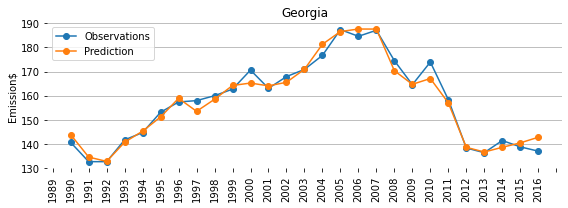

In [973]:
predict_inverse = scaler_1.inverse_transform(test_predict)
fig,ax = plt.subplots(figsize=(8,3))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Georgia")
ax.set_ylabel("Emission$")
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
x_major_locator = MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
#把x轴的主刻度设置为1的倍数
ax.xaxis.set_major_locator(x_major_locator)

ax.plot(target,'-o', label="Observations")
ax.plot(predict_inverse,'-o', label="Prediction")

labels = ax.set_xticklabels(labels=np.arange(1988,2017), rotation=90)
ax.grid(axis="y")
ax.legend(fontsize=10,loc="upper left")
plt.tight_layout()
plt.savefig('2.jpg',dpi=300)

In [536]:
from sklearn.preprocessing import MinMaxScaler
def start(i):
    target,x = combine(i)
    scaler_1 = MinMaxScaler((0.001,0.999))
    scaler_2 = MinMaxScaler((0.001,0.999))
    train_y = scaler_1.fit_transform(target)
    train_x = scaler_2.fit_transform(x)

    model = Sequential()
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=100, batch_size=16, verbose=0)
    test_predict = model.predict(train_x)
    plt.figure()
    plt.title("Train Prediction ")
    plt.xlabel("Time(Days)")
    plt.ylabel("Value")
    plt.plot(train_y, label="Observations")
    plt.plot(test_predict, label="Prediction")
    plt.legend(loc="upper left")
    predict_inverse = scaler_1.inverse_transform(test_predict)
    r2,mse,mae,mape = evaluation_model(target.reshape(-1, 1), predict_inverse.reshape(-1, 1))
    eva = np.hstack((r2,mse,mae,mape))
    return model,eva

In [826]:
def final(model_x,eva_x,i):
    pre = combine_forecast(i)
    pre_data = scaler_2.transform(pre)
    result = model_x.predict(pre_data)
    result = scaler_1.inverse_transform(result)
    State_names = co2.iloc[:,0]
    evaluation[State_names[i]]= eva_x
    new[State_names[i]]= result

R2： 0.9059733500048709
mae: 0.7601964
rmse: 1.0259887113637982
mape [1.4063827]


,index,Alabama,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Wisconsin,Wyoming,West Virginia,Michigan
0,2016,117.936195,83.619705,171.314926,318.255096,210.375305,48.920391,131.830536,121.954506,306.454315,...,23.180836,804.216003,115.228798,68.538185,42.078156,152.877533,172.782913,47.078552,141.820267,149.906967
1,2017,116.986725,87.167374,171.037521,323.101898,218.101639,48.843948,131.933090,121.758423,323.791382,...,21.666470,855.394775,113.627319,68.935471,42.447830,155.630936,173.291885,48.051460,142.877228,153.076385
2,2018,116.108521,90.582085,170.771835,327.491821,226.754974,48.763733,132.042694,121.561478,342.528503,...,20.142176,909.307556,111.966339,69.339317,42.904659,158.221588,173.779739,48.865227,143.869400,156.361435
3,2019,115.297966,93.872459,170.518051,331.316528,236.447113,48.679127,132.153473,121.363609,362.788269,...,18.607372,966.122986,110.234535,69.749931,43.454662,160.619354,174.242706,49.536198,144.799377,159.764954
4,2020,114.551636,97.046638,170.276245,334.460846,247.303970,48.589386,132.253510,121.164772,384.704010,...,17.061356,1026.018921,108.419731,70.167587,44.103668,162.790619,174.676392,50.079132,145.669647,163.289810


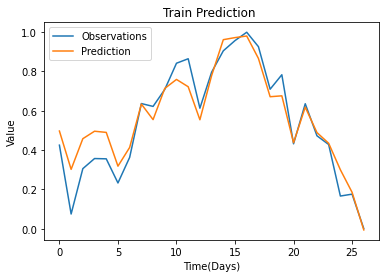

In [871]:
model,eva = start(31)
final(model,eva,31)
new.head()

In [872]:
evaluation = evaluation.T
new = new.T

In [902]:
cloumns_1  = np.array(['State','R2','mse','rmse','mape'])
cloumns_2 = np.hstack(('State',np.arange(2016,2061)))

In [914]:
evaluation_data = evaluation.iloc[1:,:].reset_index(drop=False)
result_data = new.iloc[1:,:].reset_index(drop=False)

In [918]:
evaluation_data.columns  = cloumns_1
result_data.columns = cloumns_2

In [921]:
evaluation_data.to_csv('ProblemCData/拟合/预测评价指标_2060.csv')
result_data.to_csv('ProblemCData/拟合/预测值_2060.csv')